## Figure 15

Similar to [Figure 8](https://github.com/EdwardJKim/astroclass/blob/master/paper/notebooks/figure08/p_dist.ipynb)
but for the reduced training data set.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
truth_test = np.loadtxt('../../data/truth_test.dat')
tpc_test = np.loadtxt('../../data/w1_22_0_tpc_test.mlz', unpack=True, usecols=(2,))
bmc_test = np.loadtxt('../../data/w1_22_0.bmc')

In [4]:
# read in FLUX_RADIUS and MAG_i and make a classification
def morph_class(magnitude, half_radius, cut=[0, 25, 1.0, 3.0]):
    point_source = ((magnitude > cut[0]) & (magnitude < cut[1]) &
                    (half_radius > cut[2]) & (half_radius < cut[3]))
    return point_source.astype(np.int)

mag_i_lower = 17
mag_i_upper = 21.0
r_h_lower = 1.4
r_h_upper = 2.8

r_h_test = np.loadtxt('../../data/flux_radius.test.dat')
mag_i_test = np.loadtxt('../../data/mag_i.test.dat')
morph_test = morph_class(mag_i_test, r_h_test, cut=[mag_i_lower, mag_i_upper, r_h_lower, r_h_upper])

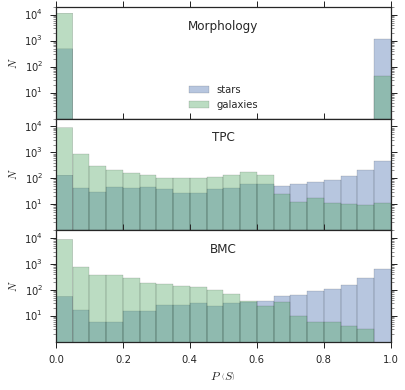

In [5]:
bins = np.linspace(0, 1, 21)
log = True
normed = False
alpha = 0.4

ylim_upper = 2*10**4

sns.color_palette()
sns.set_style("ticks")

fig = plt.figure(figsize=(6, 6))
plt.subplots_adjust(hspace=0.001)

ax1 = plt.subplot(311)
ax1.hist(morph_test[truth_test == 1], bins=bins, log=log, normed=normed,
         label='stars', alpha=alpha)
ax1.hist(morph_test[truth_test == 0], bins=bins, log=log, normed=normed,
         label='galaxies', alpha=alpha)

ax1.legend(loc='lower center')
ax1.set_xlim(0, 1)
ax1.set_ylim(1, ylim_upper)
ax1.set_ylabel(r'$N$')
ax1.get_yaxis().set_tick_params(which='both', direction='out')
ax1.text(.5,.8,'Morphology',
        horizontalalignment='center', fontsize=12,
        transform=ax1.transAxes)
ax1.set_yticks([10**1, 10**2, 10**3, 10**4])

ax2 = plt.subplot(312, sharex=ax1)
ax2.hist(tpc_test[truth_test == 1], bins=bins, log=log, normed=normed,
         label='stars', alpha=alpha)
ax2.hist(tpc_test[truth_test == 0], bins=bins, log=log, normed=normed,
         label='galaxie', alpha=alpha)
#ax2.legend(loc='upper center')
ax2.set_xlim(0, 1)
ax2.set_ylim(1, ylim_upper)
ax2.set_ylabel(r'$N$')
ax2.get_yaxis().set_tick_params(which='both', direction='out')
ax2.text(.5,.8,'TPC',
        horizontalalignment='center', fontsize=12,
        transform=ax2.transAxes)
ax2.set_yticks([10**1, 10**2, 10**3, 10**4])

ax3 = plt.subplot(313, sharex=ax1)
ax3.hist(bmc_test[truth_test == 1], bins=bins, log=log,
         label='stars', alpha=alpha)
ax3.hist(bmc_test[truth_test == 0], bins=bins, log=log,
         label='galaxies', alpha=alpha)
#ax3.legend(loc='upper center')
ax3.set_xlim(0, 1)
ax3.set_ylim(1, ylim_upper)
ax3.set_ylabel(r'$N$')
ax3.set_xlabel(r'$P\,\left(S\right)$', fontsize=12)
ax3.get_yaxis().set_tick_params(which='both', direction='out')
ax3.text(.5,.8,'BMC',
        horizontalalignment='center',
        transform=ax3.transAxes, fontsize=12)
ax3.set_yticks([10**1, 10**2, 10**3, 10**4])

xticklabels = ax1.get_xticklabels()+ax2.get_xticklabels()
plt.setp(xticklabels, visible=False)

plt.savefig('../../figures/p_dist_cut.pdf')
    
plt.show()